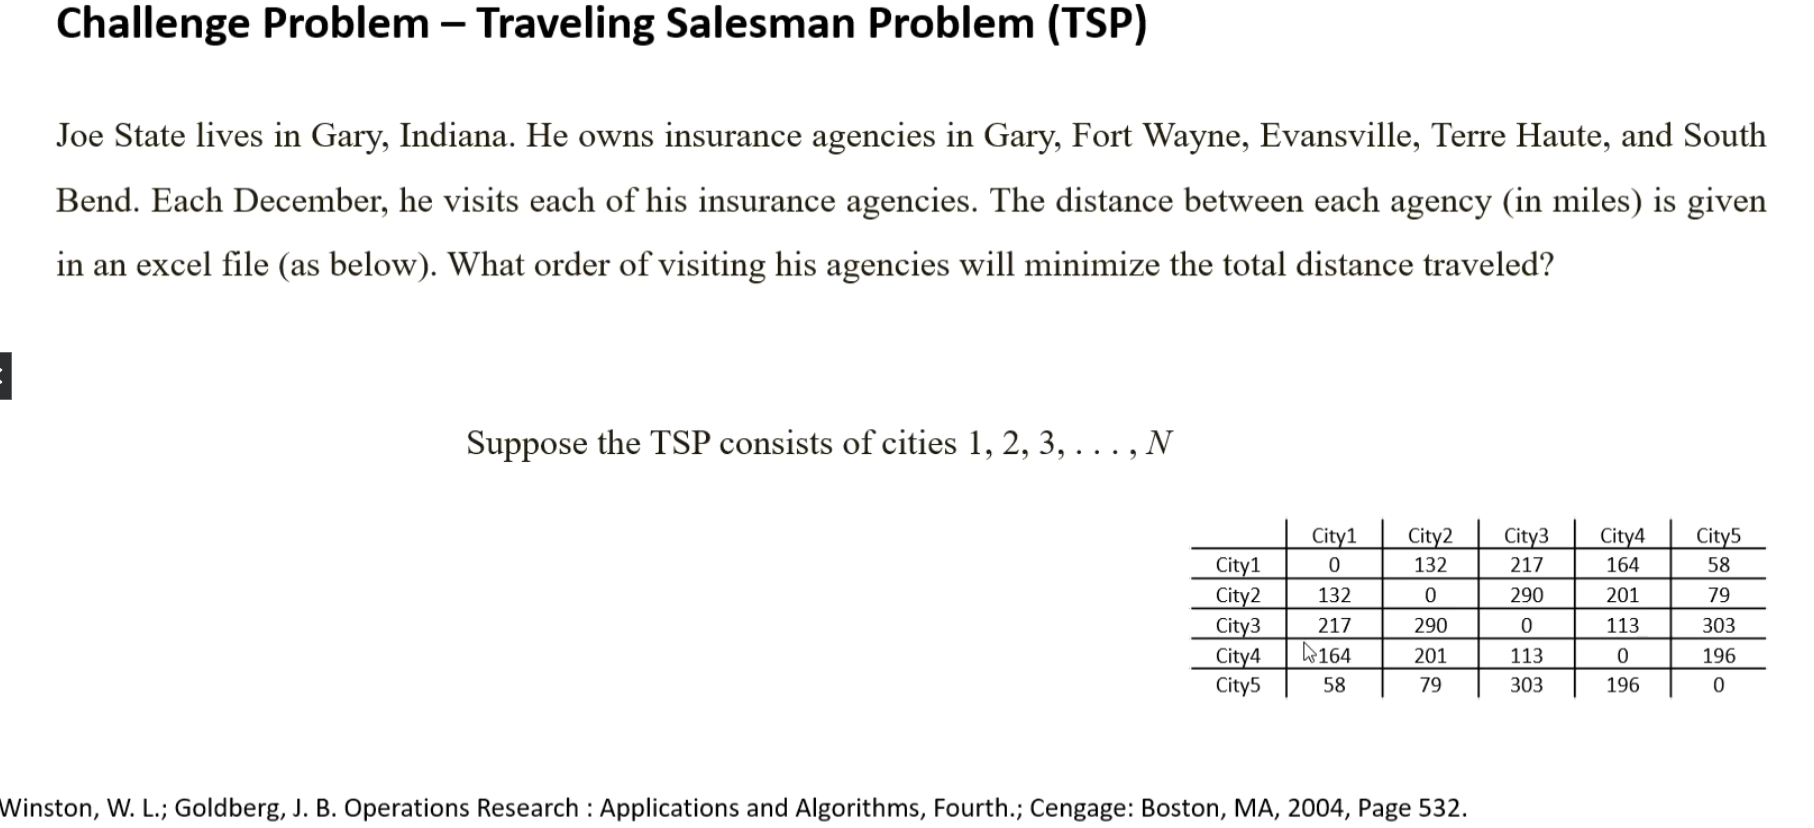

In [12]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import pandas as pd

In [13]:
model=pyo.ConcreteModel()

In [14]:
#define sets and parameters
model.i=pyo.Set(initialize=['City1', 'City2', 'City3', 'City4', 'City5']) 
model.j=pyo.Set(initialize=['City1', 'City2', 'City3', 'City4', 'City5'])

model.ii=pyo.Set(initialize=['City2', 'City3', 'City4', 'City5'])

#parameters
#the diagonal values are changed so that the salesmen is not permitted to return to the same city after leaving the city
C = pd.read_excel("S5P3_Data.xlsx",header=0, index_col=0)
#model.C=pyo.Param(initialize=C)
#C=model.C


In [15]:
#decision variables and decision function
model.x=pyo.Var(model.i, model.j, domain=pyo.Binary)
x=model.x

model.u=pyo.Var(model.i, domain=pyo.NonNegativeReals)
u=model.u

#objective function
def Objective_rule(model):
    return sum(sum(C[i][j]*x[i,j] for i in model.i) for j in model.j)

model.Objf=pyo.Objective(rule=Objective_rule, sense=pyo.minimize)

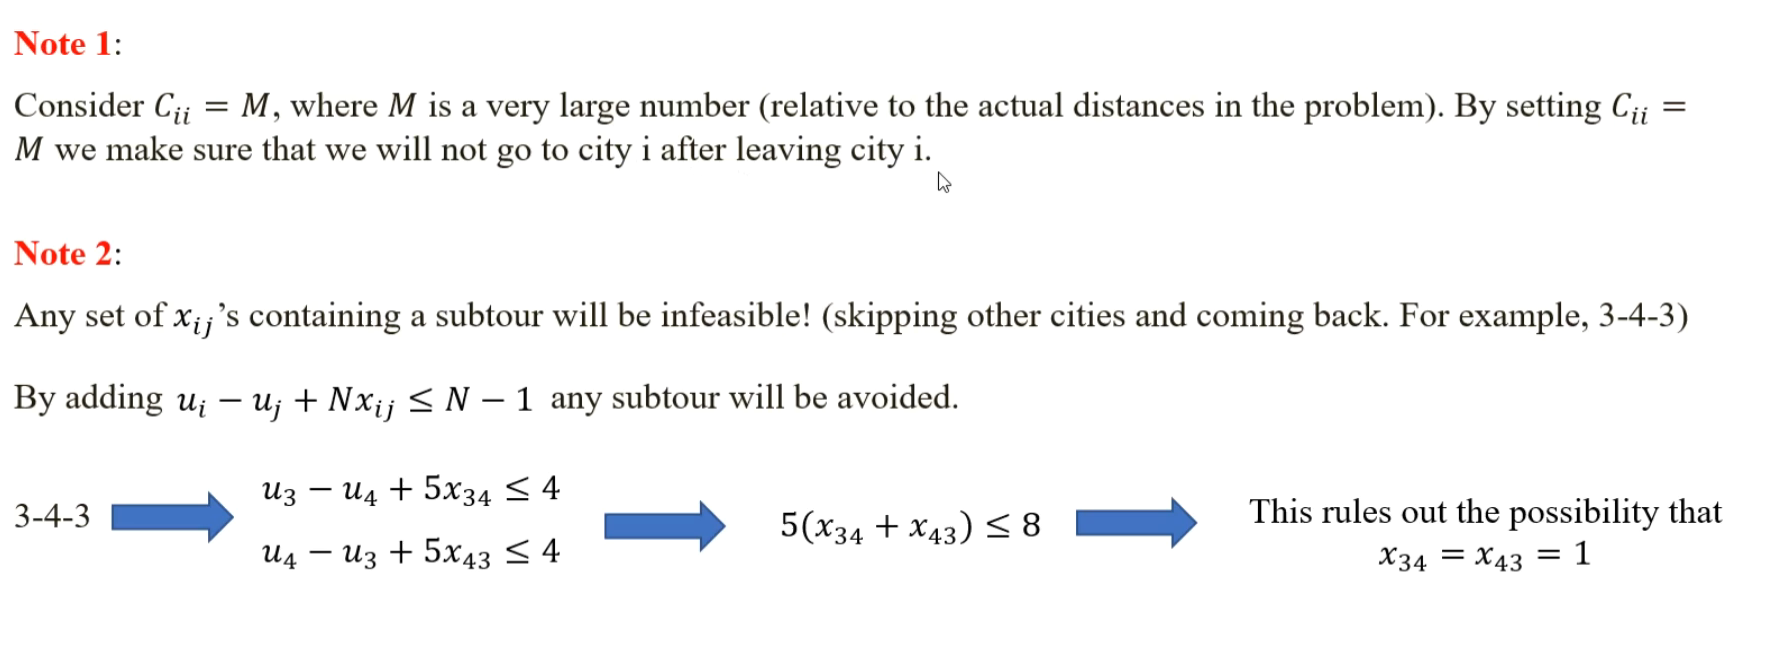

In [16]:
#constraints

def constraint1(model, j):
    return sum(x[i,j] for i in model.i)==1
model.const1=pyo.Constraint(model.i, rule=constraint1)

def constraint2(model, i):
    return sum(x[i,j] for j in model.j)==1
model.const2=pyo.Constraint(model.i, rule=constraint2)

def constraint3(model, i, j):
    if i!=j:
        return u[i]-u[j]+5*x[i,j]<=4
    else:
        return u[i]-u[j]==0

model.const3=pyo.Constraint(model.ii, model.j, rule=constraint3)

In [19]:
Solver=SolverFactory('cplex_direct')
results=Solver.solve(model)
print(results)
print('Objective function: ', model.Objf())
for i in model.i:
    for j in model.j:
        print(f"salesman goes from {i} to {j} = ", x[i,j]())


Problem: 
- Name: 
  Lower bound: 668.0
  Upper bound: 668.0
  Number of objectives: 1
  Number of constraints: 30
  Number of variables: 30
  Number of binary variables: 25
  Number of integer variables: 0
  Number of continuous variables: 5
  Number of nonzeros: None
  Sense: 1
Solver: 
- Name: CPLEX 22.1.1.0
  Status: ok
  Wallclock time: 0.014087677001953125
  Termination condition: optimal
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  668.0
salesman goes from City1 to City1 =  -0.0
salesman goes from City1 to City2 =  0.0
salesman goes from City1 to City3 =  1.0
salesman goes from City1 to City4 =  -0.0
salesman goes from City1 to City5 =  0.0
salesman goes from City2 to City1 =  -0.0
salesman goes from City2 to City2 =  -0.0
salesman goes from City2 to City3 =  -0.0
salesman goes from City2 to City4 =  0.0
salesman goes from City2 to City5 =  1.0
salesman goes from City3 to City1 =  0.0
salesman goes from City3 to City2 =  -0.0
sale